# Задание 4. Классификация методом k-ближайших соседей

### Расшифровка столбцов



1. 'NDB_No' 
2. 'Shrt_Desc' - short description 
3. 'Water_(g)'
4. 'Energ_Kcal'
5. 'Protein_(g)' - белок
6. 'Lipid_Tot_(g)' - lipid total, жир
7. 'Ash_(g)' - any inorganic material? such as minerals? presenting in food
8. 'Carbohydrt_(g)' - carbohydrate (carbs)
9. 'Fiber_TD_(g)' - волокно, td=total?
10. 'Sugar_Tot_(g)' - sugar total
11. 'Calcium_(mg)'
12. 'Iron_(mg)'
13. 'Magnesium_(mg)' - магний
14. 'Phosphorus_(mg)'
15. 'Potassium_(mg)' - калий
16. 'Sodium_(mg)' - натрий
17. 'Zinc_(mg)'
18. 'Copper_mg)' - медь
19. 'Manganese_(mg)' - марганец
20. 'Selenium_(µg)' - селен
21. 'Vit_C_(mg)'
22. 'Thiamin_(mg)'
23. 'Riboflavin_(mg)'
24. 'Niacin_(mg)'
25. 'Panto_Acid_mg)'
26. 'Vit_B6_(mg)'
27. 'Folate_Tot_(µg)' - фолат
28. 'Folic_Acid_(µg)' - фолиевая кислота
29. 'Food_Folate_(µg)' - пищевой фолат
30. 'Folate_DFE_(µg)' - folate Dietary Folate Equivalent
31. 'Choline_Tot_ (mg)' - холин
32. 'Vit_B12_(µg)'
33. 'Vit_A_IU' - vitamin A International Units
34. 'Vit_A_RAE' - vitamin A Retinol Activity Equivalent
35. 'Retinol_(µg)'
36. 'Alpha_Carot_(µg)'
37. 'Beta_Carot_(µg)'
38. 'Beta_Crypt_(µg)' - ?
39. 'Lycopene_(µg)' - ликопин
40. 'Lut+Zea_ (µg)' - ?
41. 'Vit_E_(mg)'
42. 'Vit_D_µg'
43. 'Vit_D_IU'
44. 'Vit_K_(µg)'
45. 'FA_Sat_(g)' - saturated fat
46. 'FA_Mono_(g)' - monosaturated fat
47. 'FA_Poly_(g)' polysaturated fat
48. 'Cholestrl_(mg)' - холестерин
49. 'GmWt_1' - Gram Weight?
50. 'GmWt_Desc1'
51. 'GmWt_2'
52. 'GmWt_Desc2'
53. 'Refuse_Pct' - refuse persent?



## Импорт библиотек, загрузка и обработка данных.

### Подключим библиотеки

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.exceptions import NotFittedError

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier

### Считаем данные и посмотрим на них.

В качестве размеченных данных возьмите

1) свои собственные разбиения из прошлого задания

2) разбиения одногруппника из прошлого задания (разбейтесь на пары)

3) вот это разбиение http://school.sgu.ru/mod/resource/view.php?id=11316 (метки классов в столбце CLASS)

In [ ]:
#files.upload()
product_data_Ogneva = pd.read_csv('ABBREV_with_classes_Ogneva.csv', delimiter=';')
product_data_Kireeva = pd.read_csv('ABBREV_with_classes_Kireeva.csv', delimiter=';')
product_data_course = pd.read_csv('ABBREV_with_classes.csv', delimiter=';')

In [ ]:
product_data_Kireeva.head()

NDB_No               Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  \
0    1001        BUTTER.WITH SALT      15.87         717         0.85   
1    1002  BUTTER.WHIPPED.W/ SALT      16.72         718         0.49   
2    1003    BUTTER OIL.ANHYDROUS       0.24         876         0.28   
3    1004             CHEESE.BLUE      42.41         353        21.40   
4    1005            CHEESE.BRICK      41.11         371        23.24   

   Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  ...  \
0           81.0     2.11            0.06           0.0           0.06  ...   
1           78.0     1.62            2.87           0.0           0.06  ...   
2           99.0     0.00            0.00           0.0           0.00  ...   
3           29.0     5.11            2.34           0.0           0.50  ...   
4           30.0     3.18            2.79           0.0           0.51  ...   

   FA_Mono_(g)  FA_Poly_(g)  Cholestrl_(mg)  GmWt_1  \
0       21.021        3.043             215    5.00   
1       19.874        3.331             225    3.80   
2       28.732        3.694             256   12.80   
3        7.778        0.800              75   28.35   
4        8.598        0.784              94  132.00   

                   GmWt_Desc1  GmWt_2       GmWt_Desc2  Refuse_Pct  Origin  \
0  1 pat.  (1" sq. 1/3" high)    14.2           1 tbsp         0.0  Animal   
1  1 pat.  (1" sq. 1/3" high)     9.4           1 tbsp         0.0  Animal   
2                      1 tbsp   205.0            1 cup         0.0  Animal   
3                        1 oz    17.0     1 cubic inch         0.0  Animal   
4                1 cup. diced   113.0  1 cup. shredded         0.0  Animal   

   Lipid_multiple_class  
0                  High  
1                  High  
2                  High  
3               Average  
4               Average  

[5 rows x 55 columns]

In [ ]:
product_data_Ogneva.head()

NDB_No               Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  \
0    1001        BUTTER.WITH SALT      15.87         717         0.85   
1    1002  BUTTER.WHIPPED.W/ SALT      16.72         718         0.49   
2    1003    BUTTER OIL.ANHYDROUS       0.24         876         0.28   
3    1004             CHEESE.BLUE      42.41         353        21.40   
4    1005            CHEESE.BRICK      41.11         371        23.24   

   Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  ...  \
0          81.11     2.11            0.06           0.0           0.06  ...   
1          78.30     1.62            2.87           0.0           0.06  ...   
2          99.48     0.00            0.00           0.0           0.00  ...   
3          28.74     5.11            2.34           0.0           0.50  ...   
4          29.68     3.18            2.79           0.0           0.51  ...   

   FA_Mono_(g)  FA_Poly_(g)  Cholestrl_(mg)  GmWt_1  \
0       21.021        3.043             215    5.00   
1       19.874        3.331             225    3.80   
2       28.732        3.694             256   12.80   
3        7.778        0.800              75   28.35   
4        8.598        0.784              94  132.00   

                   GmWt_Desc1  GmWt_2       GmWt_Desc2  Refuse_Pct  \
0  1 pat.  (1" sq. 1/3" high)    14.2           1 tbsp         0.0   
1  1 pat.  (1" sq. 1/3" high)     9.4           1 tbsp         0.0   
2                      1 tbsp   205.0            1 cup         0.0   
3                        1 oz    17.0     1 cubic inch         0.0   
4                1 cup. diced   113.0  1 cup. shredded         0.0   

   Energ_Kcal_binary_class  Energ_Kcal_multiple_class  
0                     High             Extremely high  
1                     High             Extremely high  
2                     High             Extremely high  
3                     High                       High  
4                     High                       High  

[5 rows x 55 columns]

In [ ]:
product_data_Ogneva.Energ_Kcal_multiple_class.unique()

array(['Extremely high', 'High', 'Moderate', 'Low', 'Extremely low'],
      dtype=object)

In [ ]:
product_data_course.head()

NDB_No  CLASS               Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  \
0    1001      0        BUTTER.WITH SALT      15.87         717         0.85   
1    1002      0  BUTTER.WHIPPED.W/ SALT      16.72         718         0.49   
2    1003     10    BUTTER OIL.ANHYDROUS       0.24         876         0.28   
3    1004      0             CHEESE.BLUE      42.41         353        21.40   
4    1005      0            CHEESE.BRICK      41.11         371        23.24   

   Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  ...  Vit_K_(µg)  \
0          81.11     2.11            0.06           0.0  ...         7.0   
1          78.30     1.62            2.87           0.0  ...         4.6   
2          99.48     0.00            0.00           0.0  ...         8.6   
3          28.74     5.11            2.34           0.0  ...         2.4   
4          29.68     3.18            2.79           0.0  ...         2.5   

   FA_Sat_(g)  FA_Mono_(g)  FA_Poly_(g)  Cholestrl_(mg)  GmWt_1  \
0      51.368       21.021        3.043             215    5.00   
1      45.390       19.874        3.331             225    3.80   
2      61.924       28.732        3.694             256   12.80   
3      18.669        7.778        0.800              75   28.35   
4      18.764        8.598        0.784              94  132.00   

                   GmWt_Desc1  GmWt_2       GmWt_Desc2  Refuse_Pct  
0  1 pat.  (1" sq. 1/3" high)    14.2           1 tbsp         0.0  
1  1 pat.  (1" sq. 1/3" high)     9.4           1 tbsp         0.0  
2                      1 tbsp   205.0            1 cup         0.0  
3                        1 oz    17.0     1 cubic inch         0.0  
4                1 cup. diced   113.0  1 cup. shredded         0.0  

[5 rows x 54 columns]

In [ ]:
product_data_course.CLASS.unique()

array([ 0, 10,  1, 11])

### Объединим датасеты и переименуем колонки.

In [ ]:
df = product_data_course.join([product_data_Ogneva[['Energ_Kcal_binary_class', 'Energ_Kcal_multiple_class']], \
                               product_data_Kireeva[['Origin', 'Lipid_multiple_class']]]) \
.rename(columns={'Energ_Kcal_binary_class': 'Ogneva_bin', 'Energ_Kcal_multiple_class': 'Ogneva_mult', \
                 'Origin': 'Kireeva_bin', 'Lipid_multiple_class': 'Kireeva_mult'})

In [ ]:
df.head()

NDB_No  CLASS               Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  \
0    1001      0        BUTTER.WITH SALT      15.87         717         0.85   
1    1002      0  BUTTER.WHIPPED.W/ SALT      16.72         718         0.49   
2    1003     10    BUTTER OIL.ANHYDROUS       0.24         876         0.28   
3    1004      0             CHEESE.BLUE      42.41         353        21.40   
4    1005      0            CHEESE.BRICK      41.11         371        23.24   

   Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  ...  Cholestrl_(mg)  \
0          81.11     2.11            0.06           0.0  ...             215   
1          78.30     1.62            2.87           0.0  ...             225   
2          99.48     0.00            0.00           0.0  ...             256   
3          28.74     5.11            2.34           0.0  ...              75   
4          29.68     3.18            2.79           0.0  ...              94   

   GmWt_1                  GmWt_Desc1  GmWt_2       GmWt_Desc2  Refuse_Pct  \
0    5.00  1 pat.  (1" sq. 1/3" high)    14.2           1 tbsp         0.0   
1    3.80  1 pat.  (1" sq. 1/3" high)     9.4           1 tbsp         0.0   
2   12.80                      1 tbsp   205.0            1 cup         0.0   
3   28.35                        1 oz    17.0     1 cubic inch         0.0   
4  132.00                1 cup. diced   113.0  1 cup. shredded         0.0   

   Ogneva_bin     Ogneva_mult  Kireeva_bin  Kireeva_mult  
0        High  Extremely high       Animal          High  
1        High  Extremely high       Animal          High  
2        High  Extremely high       Animal          High  
3        High            High       Animal       Average  
4        High            High       Animal       Average  

[5 rows x 58 columns]

### Обработаем данные

#### Удалим текстовые колонки.

In [ ]:
df = df.drop(['Shrt_Desc', 'GmWt_Desc1', 'GmWt_Desc2'], axis=1)

#### Сделаем числовыми классовые колонки.

In [ ]:
df['Ogneva_bin'] = df['Ogneva_bin'].replace({'High': 1, 'Low': 0})
df['Ogneva_mult'] = df['Ogneva_mult'].replace({'Extremely high': 4, 'High': 3, 'Moderate': 2, 'Low': 1, 'Extremely low': 0})

df['Kireeva_bin'] = df['Kireeva_bin'].replace({'Animal': 1, 'Vegetable': 0})
df['Kireeva_mult'] = df['Kireeva_mult'].replace({'High': 2, 'Average': 1, 'Low': 0})

### Заведем списки колонок

In [ ]:
class_columns = ['CLASS', 'Ogneva_bin', 'Ogneva_mult', 'Kireeva_bin', 'Kireeva_mult']
unused_columns = ['NDB_No']

## Реализуйте метод k-ближайших соседей (сами).

## Формулировка задания

Используйте различные наборы признаков и разные метрики расстояния:

1) евклидово расстояние между векторами без нормализации

2) манхэттенское расстояние без нормализации

3) евклидово расстояние с нормализацией

4) манхэттенское расстояние с нормализацией

5) введите бинарные признаки (например, "есть железо"-"нет железа")

6) оставьте только N признаков (перебирая все N-ки, если же это слишком долго, многократно повторяя выбор случайных N признаков)

N тоже нужно подобрать (но можно попросить у автора разбиения подсказку, сколько признаков он задействовал для создания своего разбиения, например, в выложенном выше файле использовано два столбца исходной таблицы)

7) подберите количество соседей - k

Используйте кросс-валидацию, а для оценки точности возьмите f-меру.

## Реализация

### Метод KNN

In [ ]:
class CustomKNeighborsClassifier:
    _estimator_type = "classifier"
    
    def __init__(self, n_neighbors=5, weights='uniform', eps=1e-9, metric='euclidean'):
        """K-Nearest Neighbors classifier.
        
        Args:
            n_neighbors: int, default=5
                Number of neighbors to use by default for :meth:`kneighbors` queries.
            weights : {'uniform', 'distance'} or callable, default='uniform'
                Weight function used in prediction.  Possible values:
                - 'uniform' : uniform weights.  All points in each neighborhood
                  are weighted equally.
                - 'distance' : weight points by the inverse of their distance.
                  in this case, closer neighbors of a query point will have a
                  greater influence than neighbors which are further away.
            eps : float, default=1e-5
                Epsilon to prevent division by 0
            metric : {'euclidean', 'manhattan'} or callable, default='euclidean'
                The distance metric to use for the tree. Possible values:
                - 'euclidean' : EuclideanDistance
                - 'manhattan' : ManhattanDistance
        """
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.eps = eps
        self.metric = metric
        
    
    def get_pairwise_distances(self, X, Y):
        """
        Returnes matrix of the pairwise distances between the rows from both X and Y.
        Args:
            X: numpy array of shape (n_samples, n_features)
            Y: numpy array of shape (k_samples, n_features)
        Returns:
            P: numpy array of shape (n_samples, k_samples)
                Matrix in which (i, j) value is the distance 
                between i'th row from the X and j'th row from the Y.
        """
        if self.metric == 'euclidean':
            P = [[np.sqrt(np.sum(np.square(X[i] - Y[j]))) for j in range(Y.shape[0])] for i in range(X.shape[0])]
        else:
            P = [[np.sum(np.abs(X[i] - Y[j])) for j in range(Y.shape[0])] for i in range(X.shape[0])]
        return np.array(P)
        #return pairwise_distances(X, Y)
    
    
    def get_class_weights(self, y, weights):
        """
        Returns a vector with sum of weights for each class 
        Args:
            y: numpy array of shape (n_samles,)
            weights: numpy array of shape (n_samples,)
                The weights of the corresponding points of y.
        Returns:
            p: numpy array of shape (n_classes)
                Array where the value at the i-th position 
                corresponds to the weight of the i-th class.
        """
        weights_sum = pd.DataFrame({'class': y, 'weights': weights}).groupby(by='class').sum()
        return pd.DataFrame(weights_sum, self.classes_).values.reshape(-1).tolist()
            
        
    def fit(self, X, y):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        self.points = X
        self.y = y
        self.classes_ = np.unique(y)
        
        
    def predict_proba(self, X):
        """Predict positive class probabilities.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples, n_classes)
                Vector containing positive class probabilities.
        """
        if hasattr(self, 'points'):
            P = self.get_pairwise_distances(X, self.points)
            
            weights_of_points = np.ones(P.shape)
            weights_of_points_sorted = np.zeros(P.shape)
            if self.weights == 'distance':
                # initialization
                weights_of_points = 1 / (P + self.eps)
                # weights counting        
                for i in range(weights_of_points.shape[0]):
                    for j in np.argsort(-weights_of_points[i])[:self.n_neighbors:]:
                        weights_of_points_sorted[i][j] = weights_of_points[i][j]
            else:
                # no other initialization required
                # weights counting
                for i in range(P.shape[0]):
                    for j in np.argsort(P[i])[:self.n_neighbors:]:
                        weights_of_points_sorted[i][j] = 1

            class_weights = np.array([self.get_class_weights(self.y, weights_of_points_sorted[i]) 
                                              for i in range(weights_of_points_sorted.shape[0])])
            
            class_probabilities_normalized = np.array([[class_weights[i][j] / np.sum(class_weights[i]) 
                                                       for j in range(class_weights.shape[1])] 
                                              for i in range(class_weights.shape[0])])
            
            return class_probabilities_normalized
        else: 
            raise NotFittedError("CustomKNeighborsClassifier instance is not fitted yet")      
            
        
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        """
        return np.argmax(self.predict_proba(X), axis=1)

### Вспомогательная функция для подсчета f-меры и вывода confusion matrix.

In [ ]:
def fit_evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    disp = plot_confusion_matrix(clf, X_test, y_test, normalize='true')
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()
    
    return f1_score(y_pred=clf.predict(X_train), y_true=y_train, average='weighted'), \
           f1_score(y_pred=clf.predict(X_test), y_true=y_test, average='weighted')

## KNN на моем датасете

In [ ]:
model = CustomKNeighborsClassifier()

In [ ]:
SLICE_Ogneva_1 = 1000

### Бинарная классификация

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


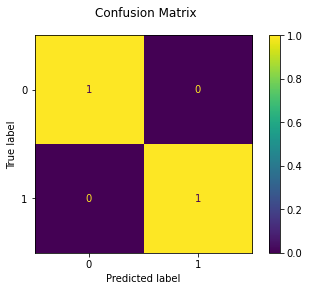

train_f1 = 1.00; test_f1 = 1.00


In [ ]:
X, y = np.array(df['Energ_Kcal'])[:SLICE_Ogneva_1:], np.array(df['Ogneva_bin'])[:SLICE_Ogneva_1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(model, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

### Многоклассовая классификация

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


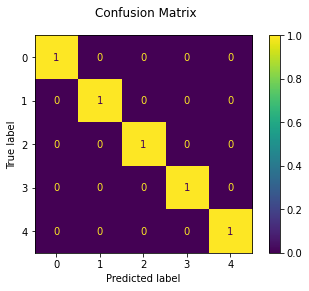

train_f1 = 1.00; test_f1 = 1.00


In [ ]:
X, y = np.array(df['Energ_Kcal'])[:SLICE_Ogneva_1:], np.array(df['Ogneva_mult'])[:SLICE_Ogneva_1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(model, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

## KNN на ритином датасете.

### Теплокарта

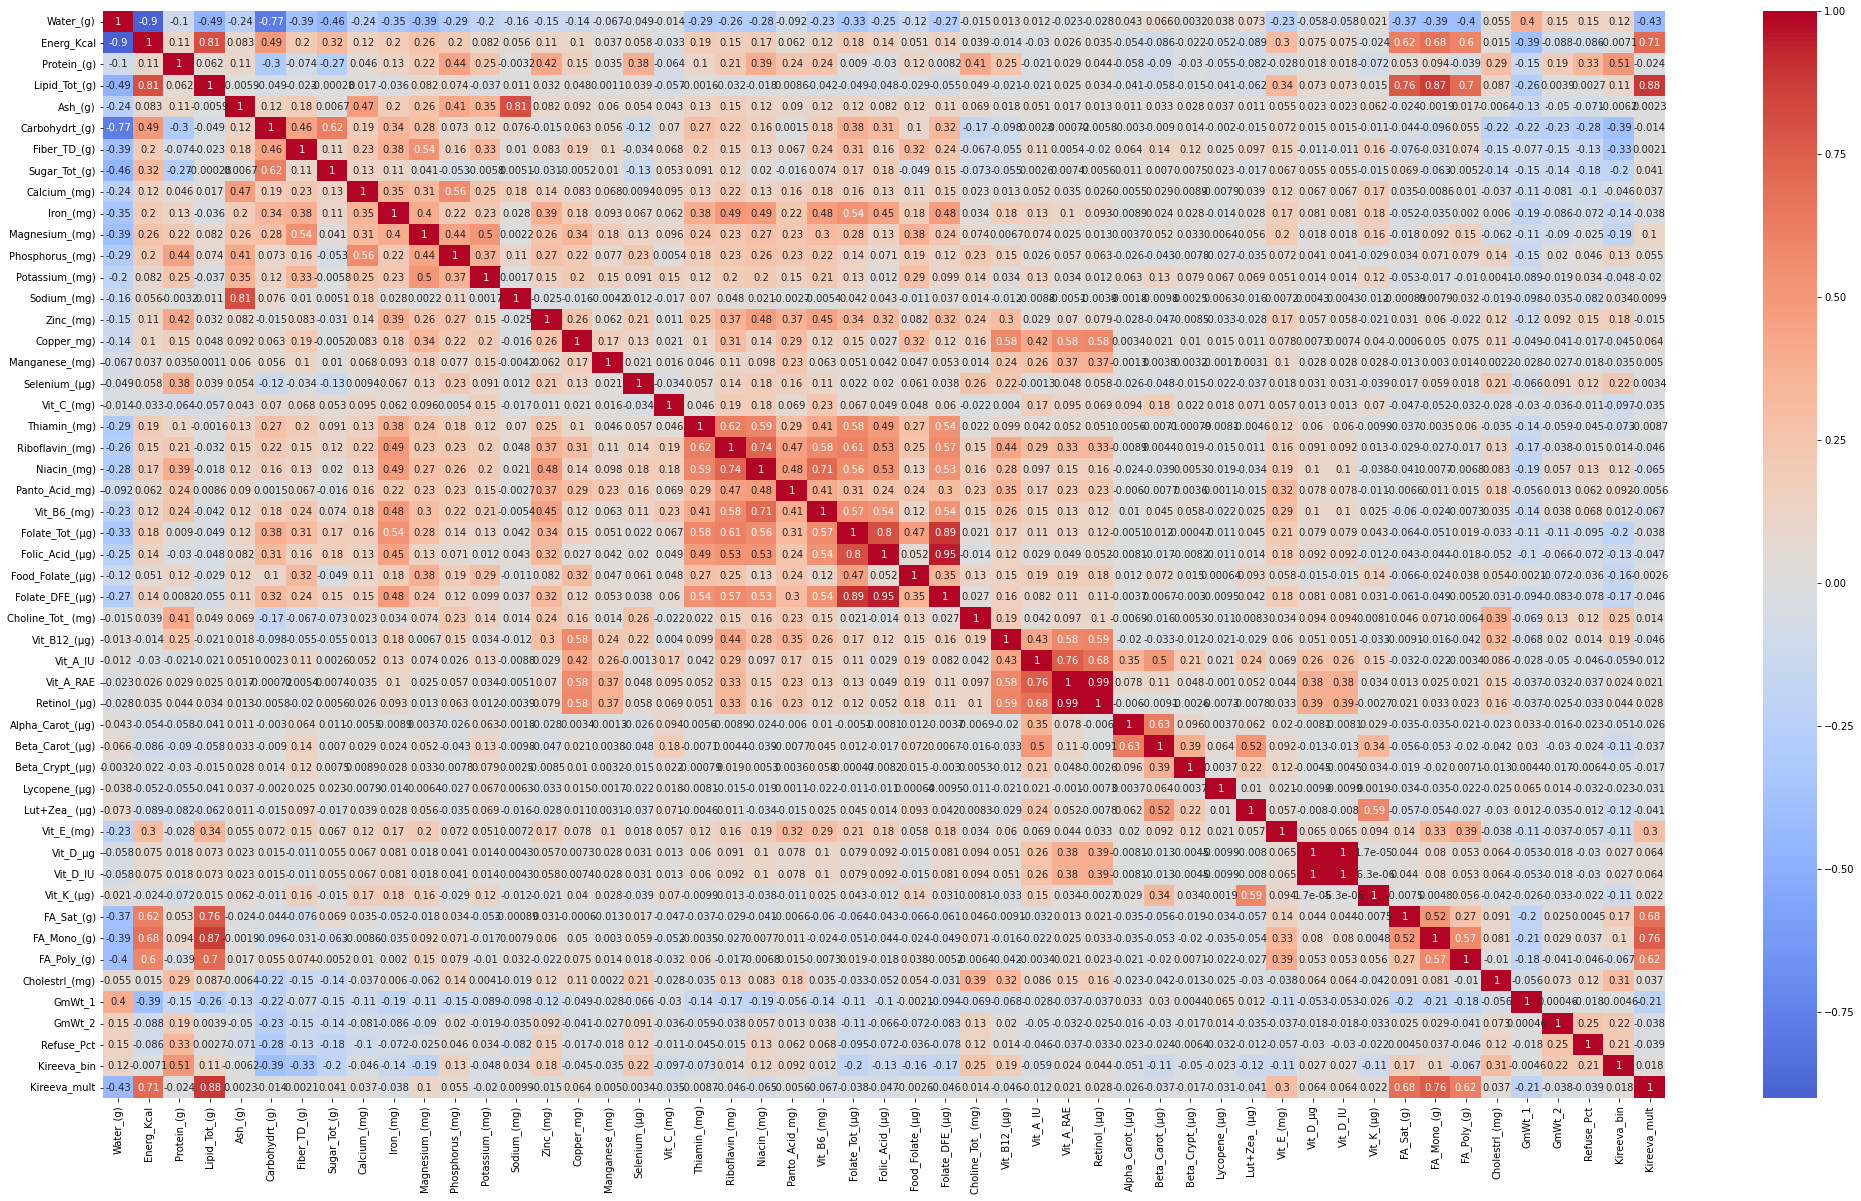

In [ ]:
_, ax = plt.subplots(figsize=(35,20))
sns.heatmap(data=pd.DataFrame.corr(df.drop(class_columns[:3:] + unused_columns, axis=1)), annot=True, cmap="coolwarm", center=0, ax=ax);

### Бинарная классификация.

In [ ]:
model = CustomKNeighborsClassifier()

In [ ]:
SLICE_Kireeva_1 = 1000

Введем бинарные колонки для тех признаков, с которыми корреляция >0.3 по модулю

In [ ]:
df['Protein_bin'] = df['Protein_(g)'].apply(lambda x: 0 if x == 0 else 1)
df['Cholestrl_bin'] = df['Cholestrl_(mg)'].apply(lambda x: 0 if x == 0 else 1)
df['Choline_Tot_bin'] = df['Choline_Tot_ (mg)'].apply(lambda x: 0 if x == 0 else 1)
df['Carbohydrt_bin'] = df['Carbohydrt_(g)'].apply(lambda x: 0 if x == 0 else 1)
df['Fiber_TD_bin'] = df['Fiber_TD_(g)'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
binary_columns = ['Protein_bin', 'Cholestrl_bin', 'Choline_Tot_bin', 'Carbohydrt_bin', 'Fiber_TD_bin']

Сделаем корреляционную матрицу для них.

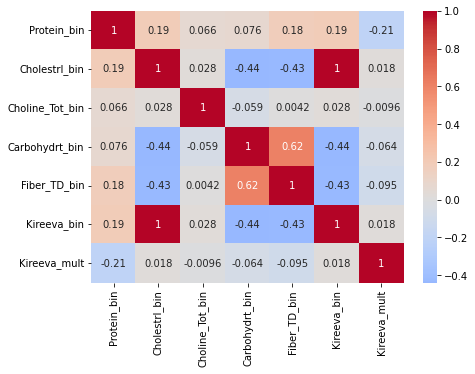

In [ ]:
_, ax = plt.subplots(figsize=(7,5))
sns.heatmap(data=pd.DataFrame.corr(df.drop(class_columns[:3:] + unused_columns, axis=1)[binary_columns + class_columns[3::]]), annot=True, cmap="coolwarm", center=0, ax=ax);

In [ ]:
df = df.drop(binary_columns, axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


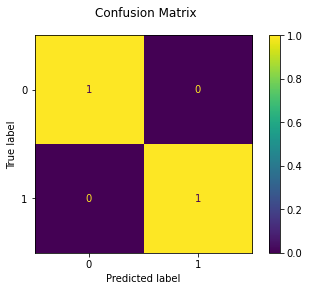

train_f1 = 1.00; test_f1 = 1.00


In [ ]:
X, y = np.array(df['Cholestrl_(mg)'])[:SLICE_Kireeva_1:], np.array(df['Kireeva_bin'])[:SLICE_Kireeva_1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(model, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

### Многоклассовая классификация.

In [ ]:
model = CustomKNeighborsClassifier()

In [ ]:
SLICE_Kireeva_2 = 2000

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


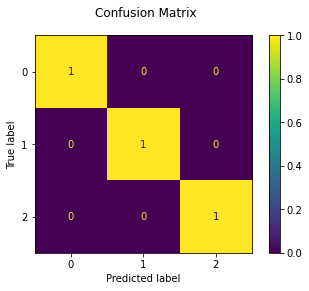

train_f1 = 1.00; test_f1 = 1.00


In [ ]:
X, y = np.array(df['Lipid_Tot_(g)'])[:SLICE_Kireeva_2:], np.array(df['Kireeva_mult'])[:SLICE_Kireeva_2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(model, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

## KNN на датасете с курса.

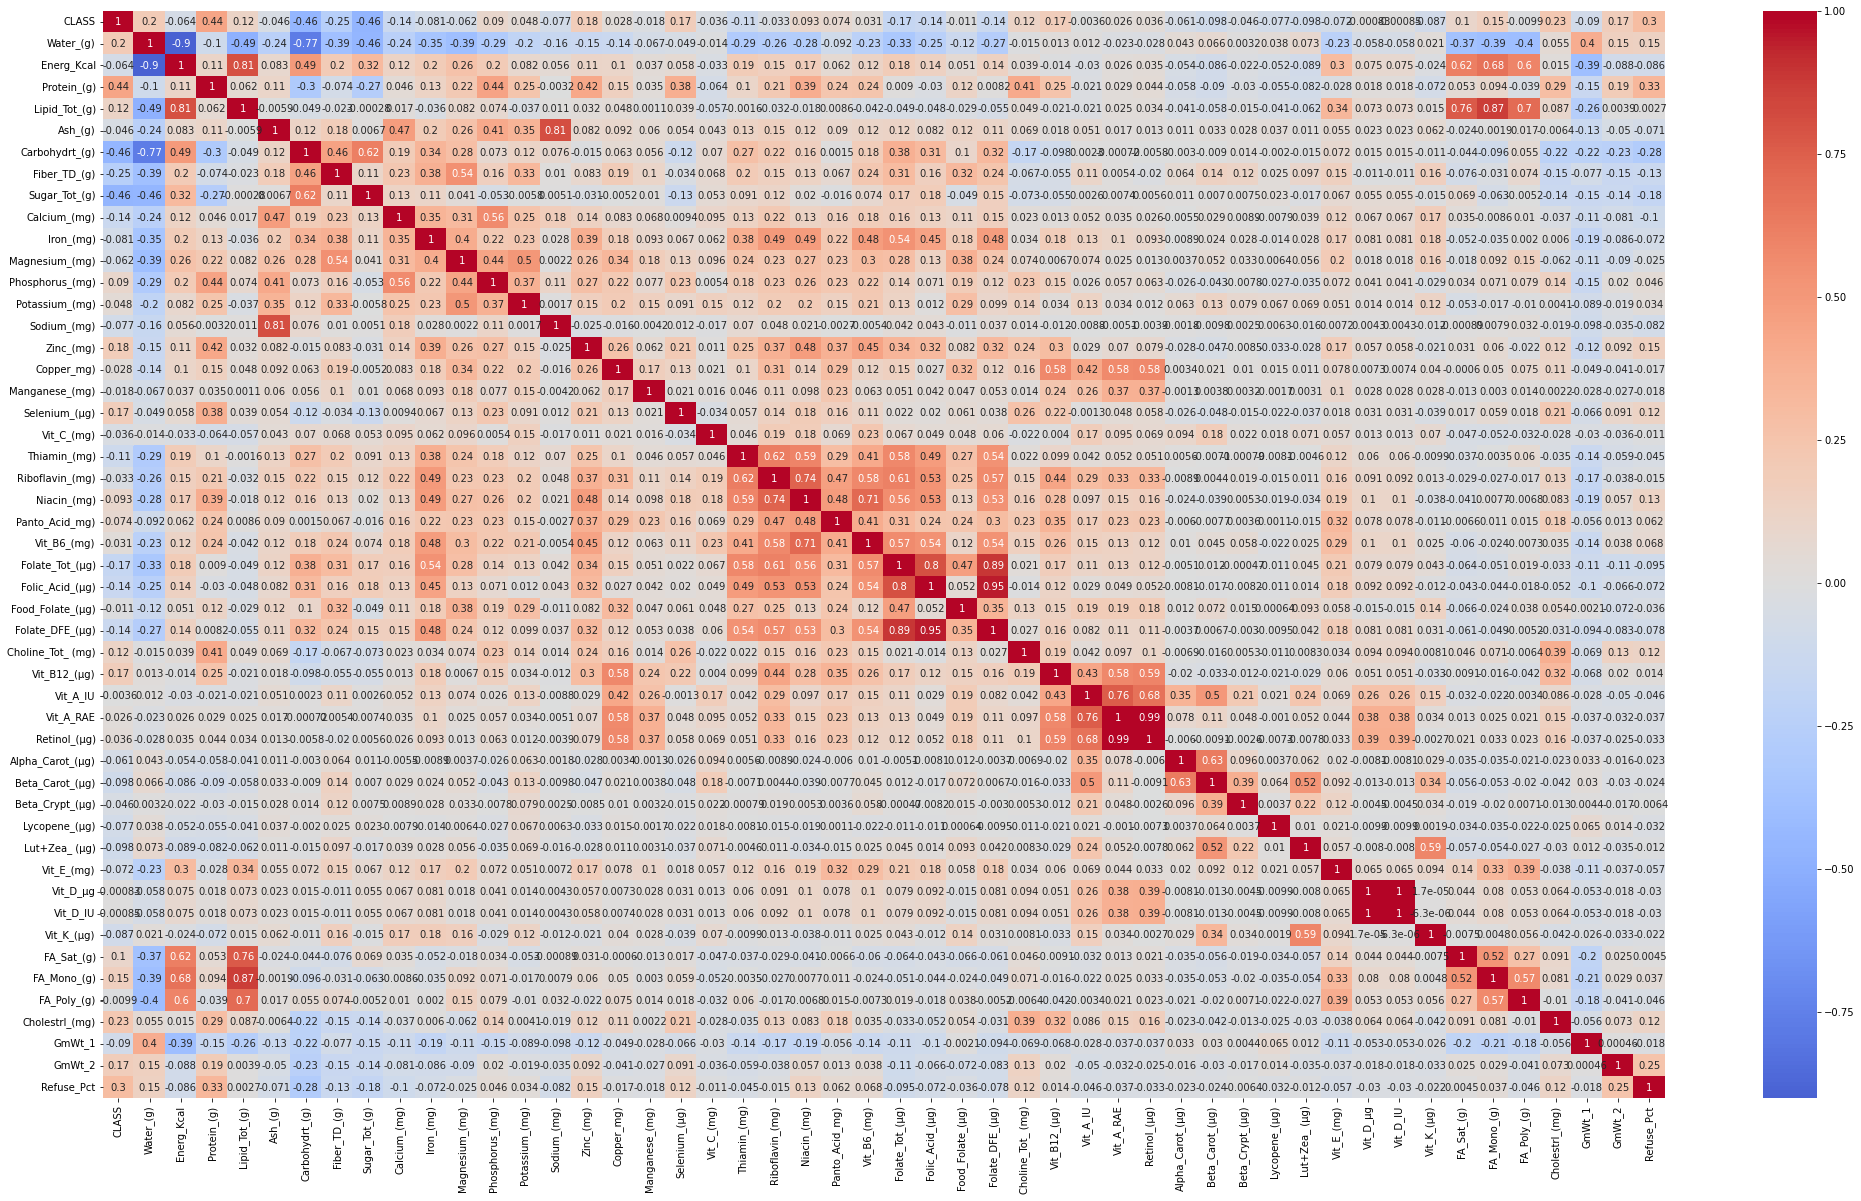

In [ ]:
_, ax = plt.subplots(figsize=(35,20))
sns.heatmap(data=pd.DataFrame.corr(df.drop(class_columns[1::] + unused_columns, axis=1)), annot=True, cmap="coolwarm", center=0, ax=ax);

In [ ]:
df['CLASS_1'] = df['CLASS'].apply(lambda x: 0 if x//10==0 else 1)
df['CLASS_2'] = df['CLASS'].apply(lambda x: 0 if x%10==0 else 1)

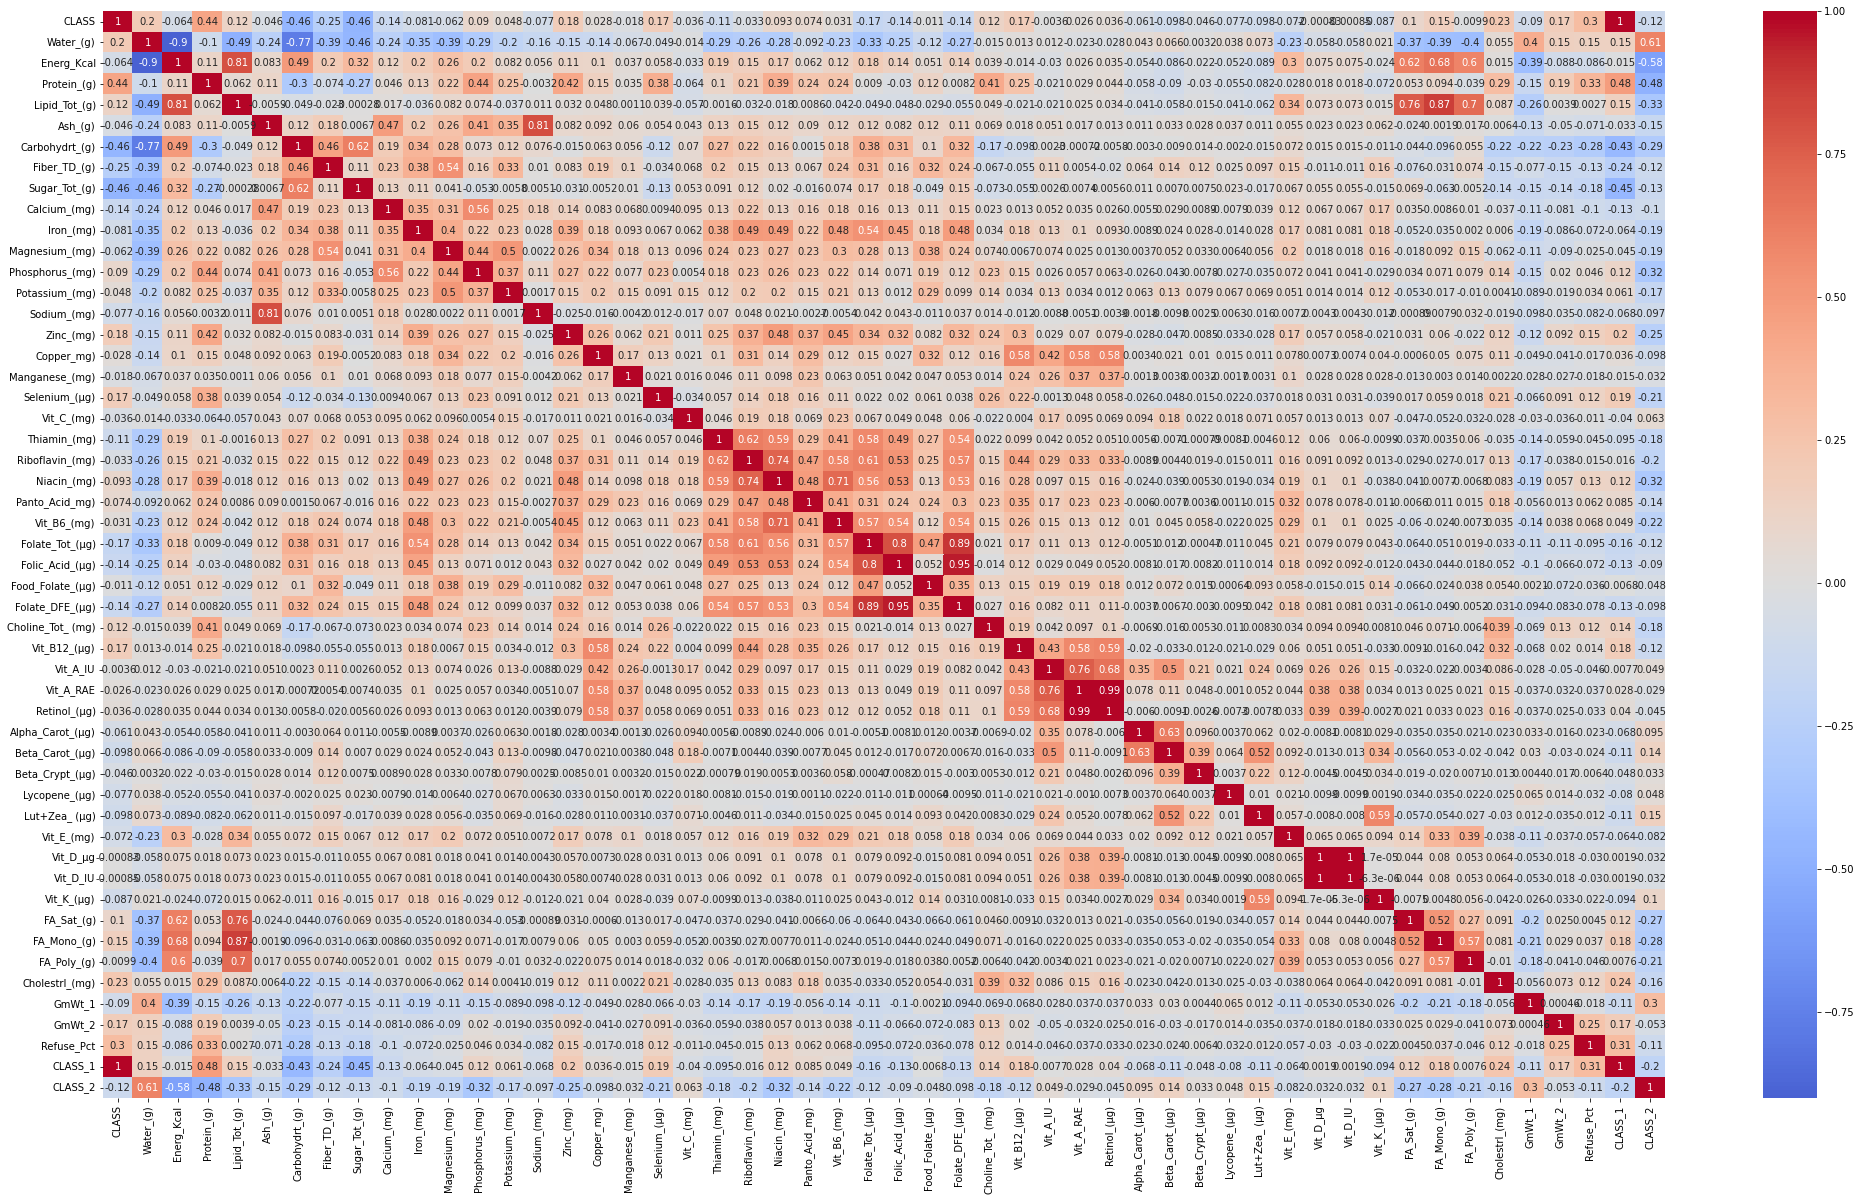

In [ ]:
_, ax = plt.subplots(figsize=(35,20))
sns.heatmap(data=pd.DataFrame.corr(df.drop(class_columns[1::] + unused_columns, axis=1)), annot=True, cmap="coolwarm", center=0, ax=ax);

Корреляция >0.3

In [ ]:
class_1_corr_list = ['Protein_(g)', 'Carbohydrt_(g)', 'Sugar_Tot_(g)', 'Refuse_Pct']
class_2_corr_list = ['Water_(g)', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Phosphorus_(mg)', 'Niacin_(mg)', 'GmWt_1']

In [ ]:
list_to_create_bins = list(set(class_1_corr_list + class_2_corr_list))
list_of_bins = [elem + '_bin' for elem in list_to_create_bins]
for elem in list_to_create_bins:
  df[elem + '_bin'] = df[elem].apply(lambda x: 0 if x == 0 else 1)

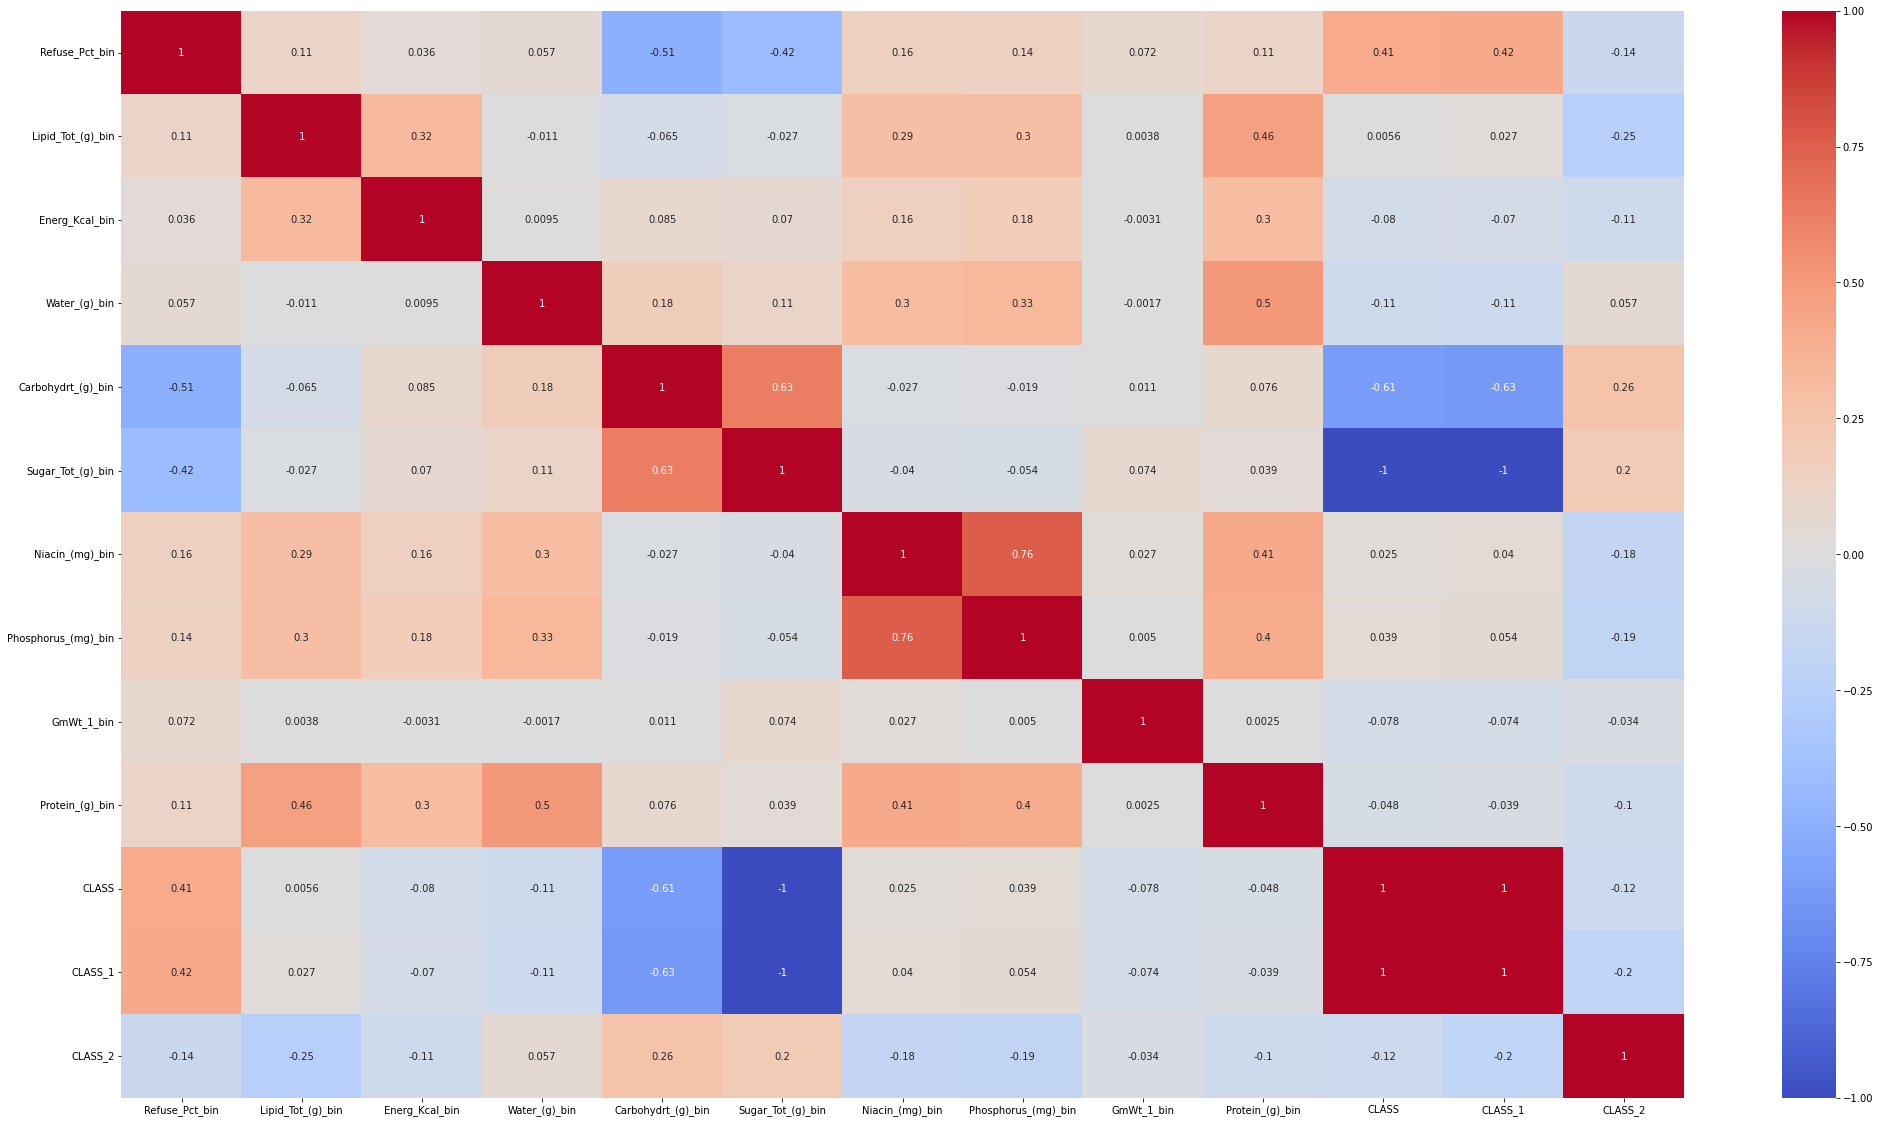

In [ ]:
_, ax = plt.subplots(figsize=(35,20))
sns.heatmap(data=pd.DataFrame.corr(df.drop(class_columns[1::] + unused_columns, axis=1)[list_of_bins + ['CLASS', 'CLASS_1', 'CLASS_2']]), annot=True, cmap="coolwarm", center=0, ax=ax);

In [ ]:
df['CLASS'] = df['CLASS'].replace({10: 2, 11: 3})

In [ ]:
model = CustomKNeighborsClassifier()
knn = KNeighborsClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


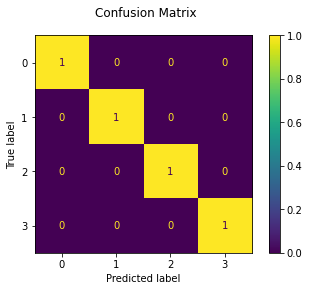

train_f1 = 1.00; test_f1 = 1.00


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']]), np.array(df['CLASS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(model, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


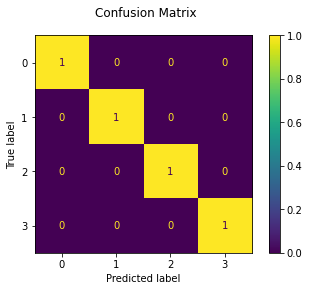

train_f1 = 1.00; test_f1 = 1.00


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']]), np.array(df['CLASS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(knn, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

Не бинарный сахар

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


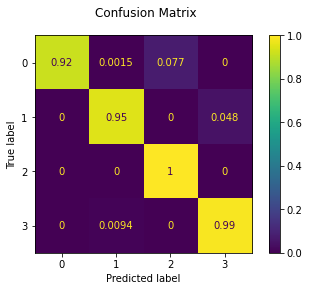

train_f1 = 0.98; test_f1 = 0.96


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)']]), np.array(df['CLASS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(model, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

## Исследование метрик

In [ ]:
SLICE_metric = 1000

### Евклидово расстояние без нормализации

In [ ]:
model = CustomKNeighborsClassifier()
knn = KNeighborsClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


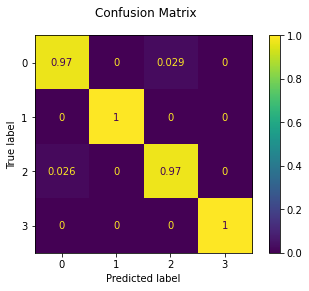

train_f1 = 0.98; test_f1 = 0.98


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']])[:SLICE_metric:], np.array(df['CLASS'])[:SLICE_metric:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(model, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


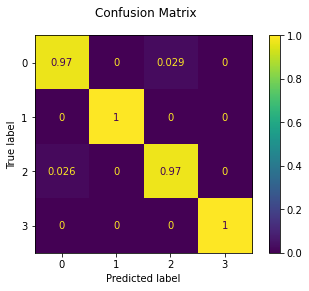

train_f1 = 0.98; test_f1 = 0.98


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']])[:SLICE_metric:], np.array(df['CLASS'])[:SLICE_metric:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(knn, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

### Евклидово расстояние с нормализацией

In [ ]:
model = CustomKNeighborsClassifier(weights='distance')
knn = KNeighborsClassifier(weights='distance')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


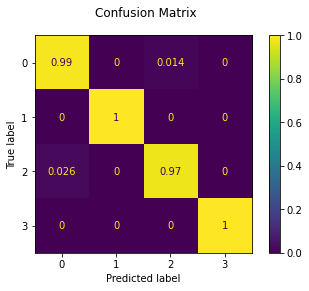

train_f1 = 1.00; test_f1 = 0.99


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']])[:SLICE_metric:], np.array(df['CLASS'])[:SLICE_metric:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(model, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


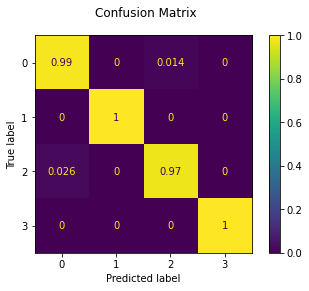

train_f1 = 1.00; test_f1 = 0.99


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']])[:SLICE_metric:], np.array(df['CLASS'])[:SLICE_metric:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(knn, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

### Манхэттенское расстояние без нормализации

In [ ]:
model = CustomKNeighborsClassifier(metric='manhattan')
knn = KNeighborsClassifier(metric='manhattan')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


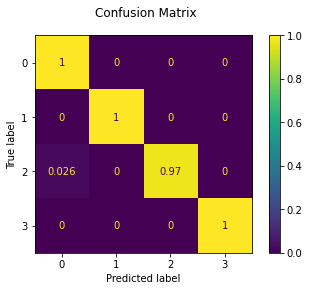

train_f1 = 0.98; test_f1 = 0.99


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']])[:SLICE_metric:], np.array(df['CLASS'])[:SLICE_metric:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(model, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


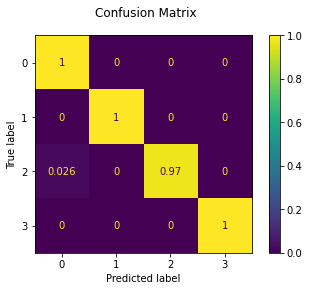

train_f1 = 0.98; test_f1 = 0.99


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']])[:SLICE_metric:], np.array(df['CLASS'])[:SLICE_metric:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(knn, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

### Манхэттенское расстояние с нормализацией

In [ ]:
model = CustomKNeighborsClassifier(metric='manhattan', weights='distance')
knn = KNeighborsClassifier(metric='manhattan', weights='distance')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


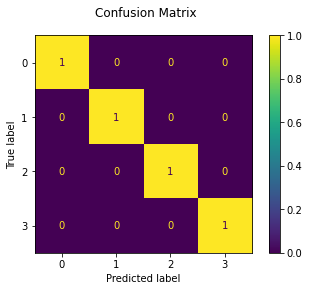

train_f1 = 1.00; test_f1 = 1.00


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']])[:SLICE_metric:], np.array(df['CLASS'])[:SLICE_metric:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(model, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


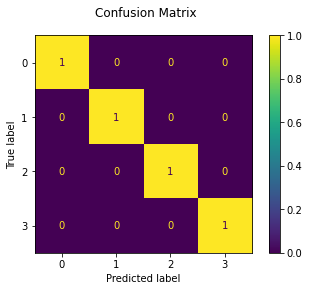

train_f1 = 1.00; test_f1 = 1.00


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']])[:SLICE_metric:], np.array(df['CLASS'])[:SLICE_metric:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(knn, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

### Вывод: самое лучшее для данного примера - манхэттенское расстояние с нормализацией.

## Исследование числа соседей

In [ ]:
SLICE_n_neighbors = 1000

In [ ]:
train_test_f1 = []

### 3 соседа

In [ ]:
model = CustomKNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier(n_neighbors=3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


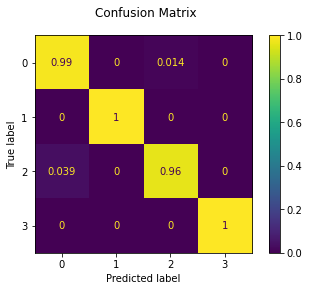

train_f1 = 0.99; test_f1 = 0.98


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']])[:SLICE_n_neighbors:], np.array(df['CLASS'])[:SLICE_n_neighbors:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(model, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


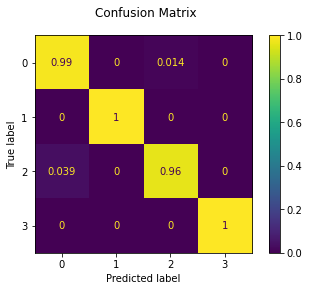

train_f1 = 0.99; test_f1 = 0.98


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']])[:SLICE_n_neighbors:], np.array(df['CLASS'])[:SLICE_n_neighbors:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(knn, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

train_test_f1.append((3, train_f1, test_f1))

### 5 соседей

In [ ]:
model = CustomKNeighborsClassifier()
knn = KNeighborsClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


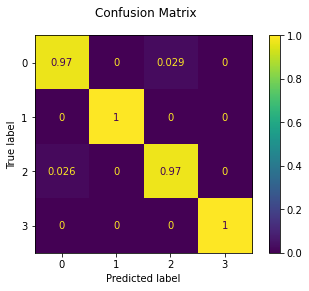

train_f1 = 0.98; test_f1 = 0.98


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']])[:SLICE_n_neighbors:], np.array(df['CLASS'])[:SLICE_n_neighbors:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(model, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


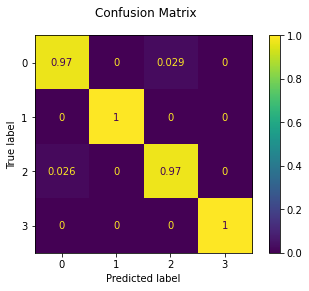

train_f1 = 0.98; test_f1 = 0.98


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']])[:SLICE_n_neighbors:], np.array(df['CLASS'])[:SLICE_n_neighbors:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(knn, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

train_test_f1.append((5, train_f1, test_f1))

### 7 соседей

In [ ]:
model = CustomKNeighborsClassifier(n_neighbors=7)
knn = KNeighborsClassifier(n_neighbors=7)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


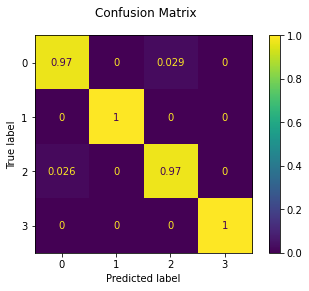

train_f1 = 0.96; test_f1 = 0.98


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']])[:SLICE_n_neighbors:], np.array(df['CLASS'])[:SLICE_n_neighbors:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(model, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


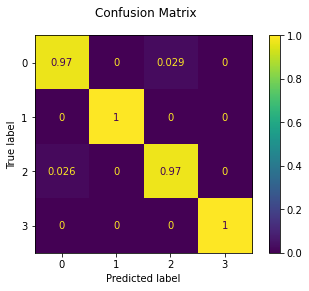

train_f1 = 0.96; test_f1 = 0.98


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']])[:SLICE_n_neighbors:], np.array(df['CLASS'])[:SLICE_n_neighbors:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(knn, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

train_test_f1.append((7, train_f1, test_f1))

### 9 соседей

In [ ]:
model = CustomKNeighborsClassifier(n_neighbors=9)
knn = KNeighborsClassifier(n_neighbors=9)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


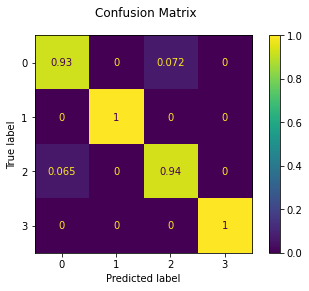

train_f1 = 0.95; test_f1 = 0.95


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']])[:SLICE_n_neighbors:], np.array(df['CLASS'])[:SLICE_n_neighbors:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(model, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


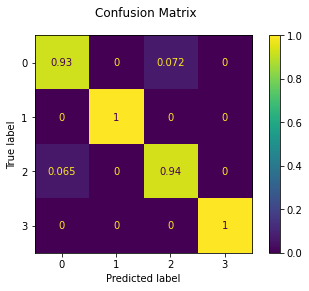

train_f1 = 0.95; test_f1 = 0.95


In [ ]:
X, y = np.array(df[['Water_(g)', 'Sugar_Tot_(g)_bin']])[:SLICE_n_neighbors:], np.array(df['CLASS'])[:SLICE_n_neighbors:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_f1, test_f1 = fit_evaluate(knn, X_train, y_train, X_test, y_test)

print(f'train_f1 = {train_f1:.2f}; test_f1 = {test_f1:.2f}')

train_test_f1.append((9, train_f1, test_f1))

### Итог

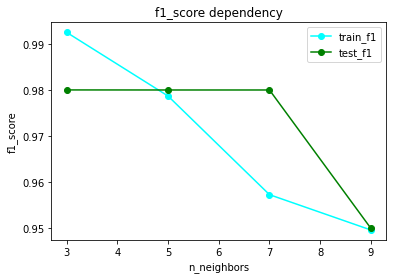

In [ ]:
plt.plot([x[0] for x in train_test_f1], [x[1] for x in train_test_f1], marker='o', color='cyan', label='train_f1')
plt.plot([x[0] for x in train_test_f1], [x[2] for x in train_test_f1], marker='o', color='green', label='test_f1')
plt.xlabel('n_neighbors')
plt.ylabel('f1_score')
plt.title('f1_score dependency')
plt.legend();

Вывод: для n_neighbors = 3, 5, 7 f-мера на тестовой выборке примерно одинакова, при n_neighbors = 9 резко падает. На тренировочной выборке f-мера падает с увеличением числа соседей.

## Кросс-валидация

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
SLICE_cross_val = 1000

In [ ]:
X, y = df[['Water_(g)', 'Sugar_Tot_(g)_bin']][:SLICE_cross_val:], df['CLASS'][:SLICE_cross_val:]

### 3 части

In [ ]:
cv_ = 3
cv_results = cross_validate(knn, X, y, cv=cv_,
                        scoring=('f1_weighted'),
                        return_train_score=True)
print('train_f1 =', cv_results['train_score'])
print(' test_f1 =', cv_results['test_score'])

train_f1 = [0.98196141 0.97898408 0.9729611 ]
 test_f1 = [0.87088881 0.85146779 0.87559329]


### 5 частей

In [ ]:
cv_ = 5
cv_results = cross_validate(knn, X, y, cv=cv_,
                        scoring=('f1_weighted'),
                        return_train_score=True)
print('train_f1 =', cv_results['train_score'])
print(' test_f1 =', cv_results['test_score'])

train_f1 = [0.97871557 0.98123549 0.9787176  0.98497832 0.97368259]
 test_f1 = [0.83206289 0.94437722 0.8438263  0.96999798 0.94965186]


### 7 частей

In [ ]:
cv_ = 7
cv_results = cross_validate(knn, X, y, cv=cv_,
                        scoring=('f1_weighted'),
                        return_train_score=True)
print('train_f1 =', cv_results['train_score'])
print(' test_f1 =', cv_results['test_score'])

train_f1 = [0.97662619 0.98832108 0.9801393  0.98482211 0.98478296 0.98714023
 0.97546684]
 test_f1 = [0.7736771  0.94997104 0.97197368 0.93658292 0.96500578 0.98602773
 0.96379956]


### 9 частей

In [ ]:
cv_ = 9
cv_results = cross_validate(knn, X, y, cv=cv_,
                        scoring=('f1_weighted'),
                        return_train_score=True)
print('train_f1 =', cv_results['train_score'])
print(' test_f1 =', cv_results['test_score'])

train_f1 = [0.97857959 0.98422974 0.98536195 0.98198345 0.98874756 0.98420704
 0.98648378 0.98760421 0.98083764]
 test_f1 = [0.7979225  0.93688984 0.95432575 0.97294684 0.96365682 0.94582373
 0.96404749 0.9909997  0.95345182]


### Вывод: данные несбалансированные.